In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

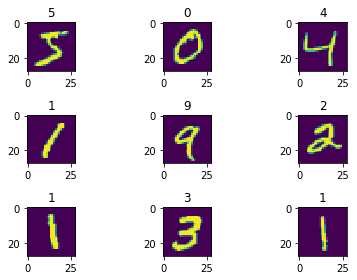

In [2]:
data = sio.loadmat('mnist.mat')
for k in xrange(9):
    plt.subplot(3,3,k+1)
    plt.imshow(np.reshape(data['trainX'][k,:],(28,28)))
    plt.title(data['trainY'][0,k])
plt.tight_layout()

In [6]:
def scale_X(X):
    X = X.astype(float)
    idx = np.not_equal(X,0)
    X = X / 255.
    return X

def get_49(X,y):
    idx = np.logical_or(np.equal(y,4) ,  np.equal(y,9))
    X = scale_X(X[idx,:])
    y = y[idx]
    y[np.equal(y,4)] = -1
    y[np.equal(y,9)] = 1
    return X,y

X = data['trainX'].astype(float)
y = data['trainY'][0].astype(float)
X,y = get_49(X,y)
Xt = data['testX'].astype(float)
yt = data['testY'][0].astype(float)
Xt,yt = get_49(Xt,yt)


Xmean = np.mean(X,axis=0)
X = X - np.outer(np.ones(X.shape[0]),Xmean)
Xt = Xt - np.outer(np.ones(Xt.shape[0]),Xmean)
    

print X.shape, y.shape, Xt.shape, yt.shape

def get_loss(y,y_est):
    loss = np.sum(np.power(y_est-y,2.))
    return loss
def get_misclassify(y,y_est):
    misclassify = np.sum(np.not_equal(np.sign(y_est),y))/(len(y)+0.)
    return misclassify





(11791L, 784L) (11791L,) (1991L, 784L) (1991L,)


train loss: 2136.558658
train loss: 2136.558657, train misclassification rate: 0.030956
test loss: 492.499667, test misclassification rate: 0.035660


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log


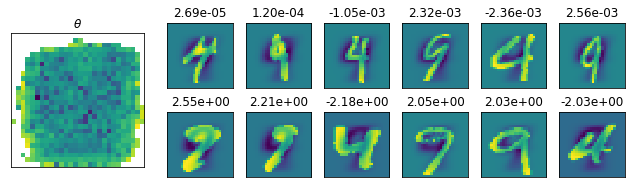

In [7]:


m,n = X.shape
theta_ls = np.linalg.solve(np.dot(X.T,X)+.0001*np.eye(n),np.dot(X.T,y))

print 'train loss: %f' % get_loss(np.dot(X,theta_ls),y)


def get_grad(theta):
    return np.dot(X.T,np.dot(X,theta)-y)
    
    
theta = theta_ls + 0.
for iter in xrange(1000):
    theta -= get_grad(theta)*.00001
    #print np.sum(np.power(np.dot(X,theta)-y,2.))
theta_ls = theta 
    





y_est = np.dot(X,theta_ls)
train_loss = get_loss(y,y_est)
train_misclassify = get_misclassify(y,y_est)
print 'train loss: %f, train misclassification rate: %f'  % ( train_loss, train_misclassify)


yt_est = np.dot(Xt,theta_ls)
test_loss = get_loss(yt,yt_est)
test_misclassify = get_misclassify(yt,yt_est)
print 'test loss: %f, test misclassification rate: %f'  % ( test_loss, test_misclassify)



v = np.abs(np.dot(X,theta_ls))

plt.figure(figsize = (11,3))
idx = np.argsort(v)
idx = idx[[0,1,3,6,7,8,-1,-2,-3,-4,-5,-6]]


ax = plt.subplot(1,4,1)
plt.imshow(np.log(np.abs(np.reshape(theta_ls,(28,28)))))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.title('$\\theta$')

for i in xrange(12):
    
    
    if i < 6: j = i+3
    else: j = i + 5
    ax = plt.subplot( 2,8,j)
    x = np.reshape(X[idx[i],:],(28,28))
    plt.imshow(x)
    plt.title('%.2e' % np.dot(X[idx[i],:],theta_ls))
    
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    
plt.savefig('linreg_mnist.png')
    

In [10]:
#logistic regression

m,n = X.shape
Xy = (X.T*y.T).T
Xyt = (Xt.T*yt.T).T

def sigmoid(c):
    return np.exp(c)/(1.+np.exp(c))




def get_loss(theta, Xy):
    loss = -np.sum(np.log(sigmoid(np.dot(Xy,theta))))/(Xy.shape[0]+0.)
    return loss


def get_grad(theta):
    s = sigmoid(np.dot(Xy,theta))
    return np.dot(Xy.T,(s-1.))/(m+0.)

train_loss = []
train_err = []
test_loss = []
test_err = []
theta = np.zeros(X.shape[1]) * 0.
for iter in xrange(5000):
    theta -= get_grad(theta)*.001
    train_loss.append(get_loss(theta, Xy))
    test_loss.append(get_loss(theta,Xyt))
    train_err.append(get_misclassify(y,np.dot(X,theta)))
    test_err.append(get_misclassify(yt,np.dot(Xt,theta)))
    
    if iter % 100 == 0:
        print iter, get_loss(theta,Xy),get_misclassify(y,np.dot(X,theta)), get_misclassify(yt,np.dot(Xt,theta))
    
    

y_est = np.dot(X,theta)
print get_loss(theta, Xy), get_misclassify(y,y_est)


yt_est = np.dot(Xt,theta)
print get_loss(theta, Xyt), get_misclassify(yt,yt_est)



0 0.6927614904205515 0.12763972521414638 0.11803114013058764
100 0.6566674896117485 0.12229666694936817 0.11702661978905073
200 0.6249435056376788 0.11729285047917903 0.11300853842290307
300 0.5968912896490789 0.11237384445763718 0.10848819688598695
400 0.5719303775878879 0.10813332202527351 0.10547463586137619
500 0.5495833987724378 0.10482571452802986 0.10195881466599699
600 0.5294594235266454 0.10236621151725893 0.09693621295831241
700 0.5112382350160403 0.09999151895513528 0.09291813159216473
800 0.494656705123633 0.0973623950470698 0.08990457056755399
900 0.47949753013783963 0.09498770248494615 0.0873932697137117
1000 0.46558015506290934 0.09168009498770248 0.08638874937217479
1100 0.45275356131499067 0.09015350691205157 0.08488196885986941
1200 0.44089057125558795 0.08828767704181155 0.08237066800602712
1300 0.42988335741385797 0.08642184717157153 0.08237066800602712
1400 0.41963989595748324 0.08531931133915699 0.07935710698141638
1500 0.41008115570489134 0.08328386057162242 0.07

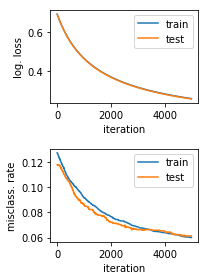

In [11]:
plt.figure(figsize = (3,4))
plt.subplot(2,1,1)
plt.plot(train_loss)
plt.plot(test_loss)
plt.xlabel('iteration')
plt.ylabel('log. loss')
plt.legend(['train','test'])
plt.subplot(2,1,2)
plt.plot(train_err)
plt.plot(test_err)
plt.legend(['train','test'])
plt.xlabel('iteration')
plt.ylabel('misclass. rate')
plt.tight_layout()
plt.savefig('hw1_mnist.png')
plt.savefig('hw1_mnist.eps')